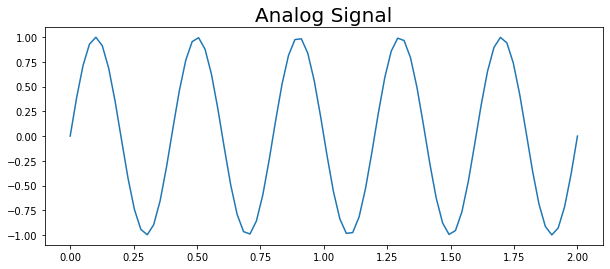

In [70]:
#JAMIL MAHMOOD
#ROLL : 2017331084

#Pulse_Code_Modulation(PCM)

import numpy as np
import matplotlib.pyplot as plt
import math
A = 10                         
f = 2
T = 1 / f #T - Time period of the signal
t = np.linspace(0, 2.0, 80) #t - Time variable of the signal
def create_sinusoidal(A, f, phase = 0):
  x = A * np.sin(2.5 * np.pi * f * t)
  return x
x = create_sinusoidal(1,2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.set_title('Analog Signal', fontsize = 20)
plt.plot(t, x)
plt.show()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


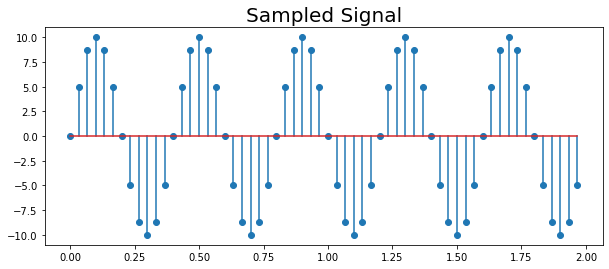

In [77]:
#Sampled signal

n = 15 #n = number_of_sample_per_interval
fs = n * f #fs = sampling rate
ts=np.arange(0, 2, 1 / fs) #ts = sampling interval
xs=A*np.sin(2.5*np.pi*f*ts); # xs Sampled signal 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.stem(ts,xs)
ax.set_title('Sampled Signal', fontsize = 20)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


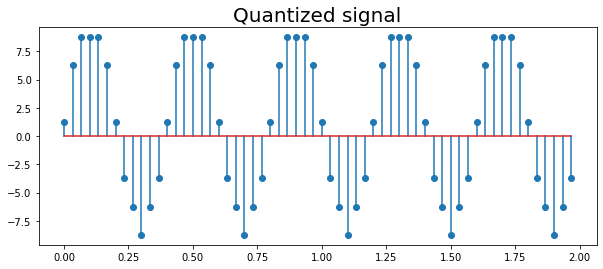

In [80]:
#Quantized signal

b_bit = 3 #number of bits required to encode each quantization level. 
L = 2 ** b_bit #L = uniformly spaced quantization levels
vmax=A;
vmin=-vmax;
delta=(vmax-vmin)/L;
partition = np.arange(vmin, vmax, delta) #level are between vmin and vmax with difference of delta
codebook= np.arange(vmin-(delta/2),vmax+(delta/2), delta)  #decrease the partition by half of delta


xq = np.copy(xs) #xq = quantized signal
encode = np.copy(xs) #assigned codec

for i in range(len(partition)):
  left = codebook[i]
  right = codebook[i + 1]
  for j in range(len(xs)):
    # left <= xs[i] < right
    if(i != len(partition) - 1 and left <= xs[j] and xs[j] < right):
      xq[j] = partition[i]
      encode[j] = i
    # left <= xs[i], only for last portion
    if(i == len(partition) - 1 and left <= xs[j]):
      xq[j] = partition[i]
      encode[j] = i

for i in range(len(xq)):
    xq[i] = xq[i] + (delta / 2) 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.stem(ts,xq)
ax.set_title('Quantized signal', fontsize = 20)

plt.show()

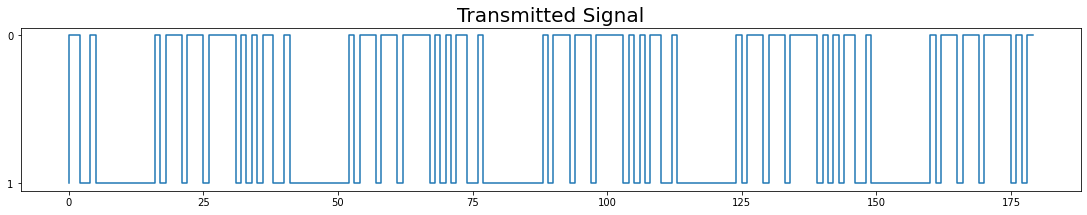

In [83]:
#Transmitted Signal

def decimalToBinary(val, bit):
    binary = "{0:b}".format(int(val))
    if(len(binary) > bit):
      return binary
    extra_zero = bit - len(binary)
    return extra_zero * "0" + binary

binary_codec = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], b_bit)
  for j in range(len(binary)):
    binary_codec.append(binary[j])

pos = np.arange(len(binary_codec))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(19, 3))
ax.step(pos, binary_codec)
ax.set_title('Transmitted Signal', fontsize = 20)

plt.show()